Name: Aslihan Oztunc
<br>Date: June 18th, 2023

<font size = 5> Short Description of My Dataset

The dataset is called "Bike Sharing Dataset" that was downloaded on https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset.
It contains daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

I am interested in this dataset because the data is pretty clean and straightforward. Since the subject is about bicycles, I thought it would be enjoyable to work on this subject.

<font size = 5> Import and Read the Dataset

In [1]:
import pandas as pd

#Read the dataset
df = pd.read_csv('day.csv')

#View the dataframe
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<font size = 5> Data Characteristics

We will be using these features:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


Target: Predication of daily bike rental count based on the environmental and seasonal settings.
"cnt" column is our target. cnt = casual + registered


In [2]:
df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['hum'] = df['hum']*100
df['windspeed'] = df['windspeed']*67

'temp', 'atemp', 'hum' and 'windspeed' columns were already scaled. Above line, I unscaled them because I am going to scale them using the TensorFlow Scaler, so I removed the normalization for these variables.

In [3]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
#Checking if there is any missing value.
df.isna().sum()
#There is no missing value.

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


All of these variables have different scales for all the variables.

Also, some of the variables are intended to be categorical, not numerical. For example,
<br>Season is 1:springer, 2:summer, 3:fall, 4:winter
<br>Year  is 0:2011, 1:2012
<br>Refer to "Data Characteristics".

<font size = 4> Define X and y

In [6]:
y = df['cnt']                        #y is the target.
X = df[df.columns.drop('cnt')]       #Removing the target for X.

X = X.drop(columns= ['dteday', 'casual', 'registered', 'instant'])

X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518


I dropped these:

'cnt', 'casual', 'registered' because they are my target variables. cnt = casual + registered
<br>'dteday' because of the date object. I am going to use XGBoost, it is a numeric algorithm.<br>'instant' because it is just an index. It doesn't affect my predicted variable.

<font size = 5> Data Visualizations

In [7]:
import numpy as np
import matplotlib.pyplot as plt

<font size = 4> Scatter Plot of Windspeed & Count

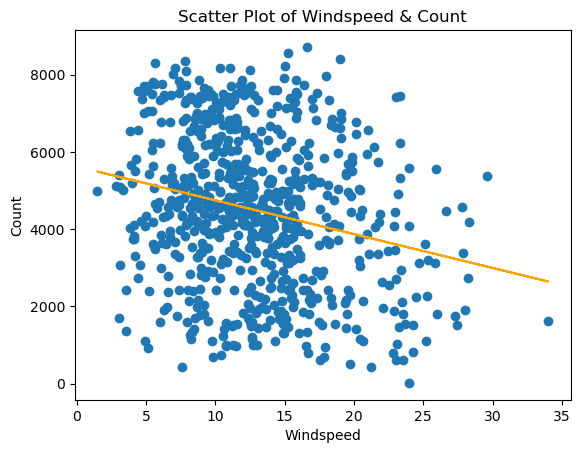

In [8]:
y = df['cnt']
x = df['windspeed']

plt.scatter(x,y)
plt.xlabel('Windspeed')
plt.ylabel('Count')

plt.title('Scatter Plot of Windspeed & Count')

#Regression Line
s, l = np.polyfit(x, y, 1)

plt.plot(x, s*x+l, color = 'orange')

plt.show()

In this plot, there is no any clear relationship between count and windspeed.

<font size = 4> Scatter Plot of Temperature & Count

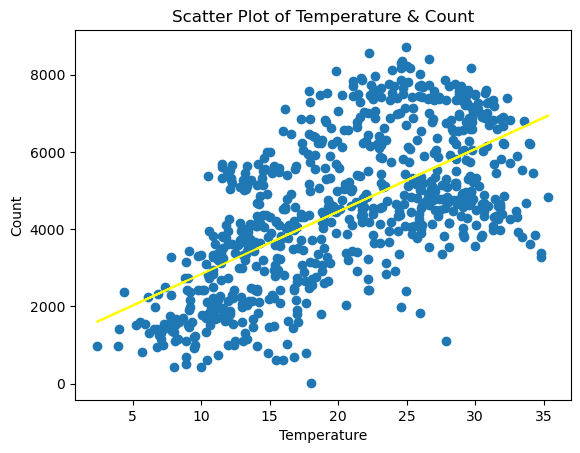

In [9]:
y = df['cnt']
x = df['temp']

plt.scatter(x,y)
plt.xlabel('Temperature')
plt.ylabel('Count')

plt.title('Scatter Plot of Temperature & Count')

#Regression line
s, l = np.polyfit(x, y, 1)

plt.plot(x, s*x+l, color = 'yellow')

plt.show()

In this plot, there is somewhat linear relationship between count and temperature.

<font size = 4> Histogram of Count

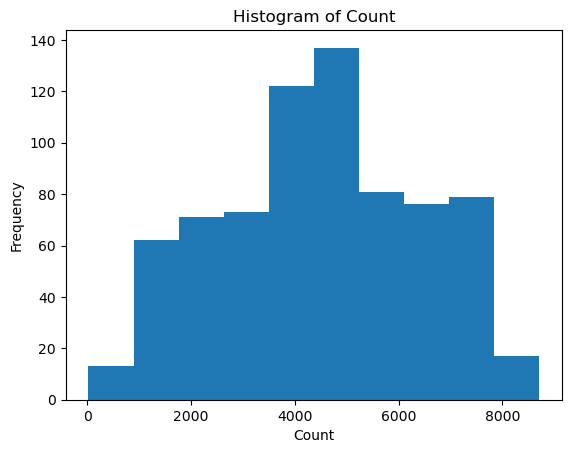

In [10]:
x = df['cnt']
plt.hist(x)

plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Count')

plt.show()

This plot shows us that what the distribution of my target variable count is.

<font size = 4>Histogram of Casual & Registered

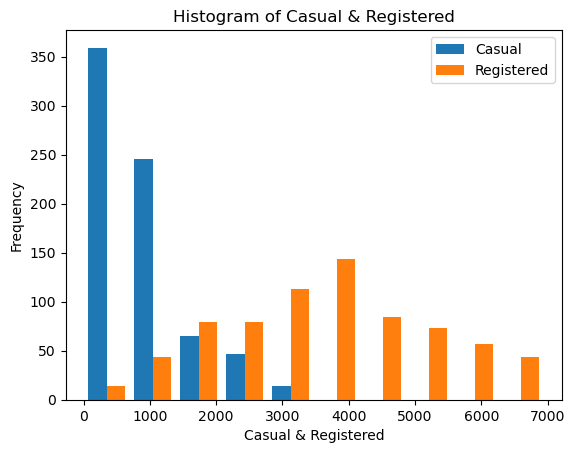

In [11]:
x = df['casual']
y = df['registered']
plt.hist([x,y])

plt.xlabel('Casual & Registered')
plt.ylabel('Frequency')
plt.title('Histogram of Casual & Registered')
plt.legend(['Casual', 'Registered'])
plt.show()

In this plot, it shows us that if the value is higher than 3000, it is most likely to be registered. if the value is less than 3000, it is most likely casual.

<font size = 4> Histogram of Wind Speed

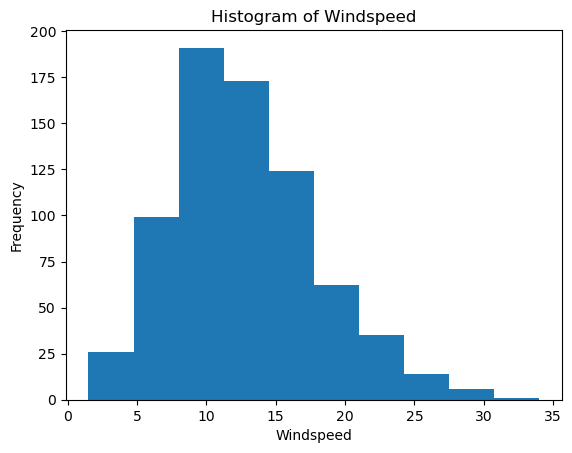

In [12]:
x = df['windspeed']
plt.hist(x)

plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.title('Histogram of Windspeed')

plt.show()

This histogram shows us the distrubution of windspeed variable. The distribituon similar to bell curve.

<font size = 4> Histogram of Humidity

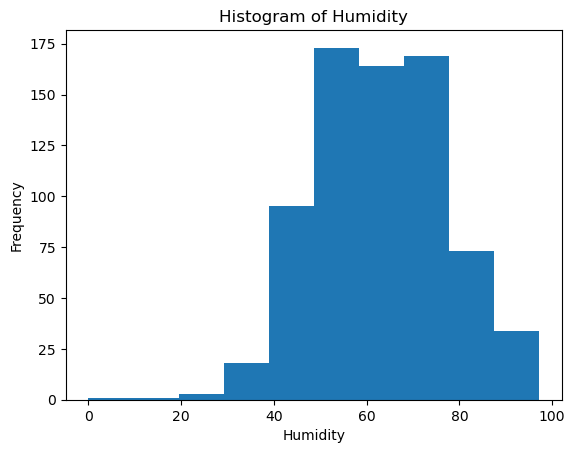

In [13]:
x = df['hum']
plt.hist(x)

plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity')


plt.show()

This histogram shows us the distribution of humidity variable. We can see that the mean is close to 60.

<font size = 4>Boxplot of Count

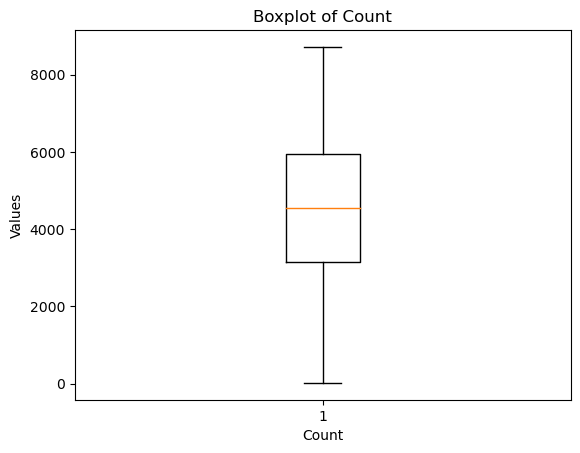

In [14]:
y = df['cnt']
plt.boxplot(y)


plt.xlabel('Count')
plt.ylabel('Values')
plt.title('Boxplot of Count')

plt.show()

This plot shows the range of the target value.

<font size=4>Boxplot of Casual & Registered

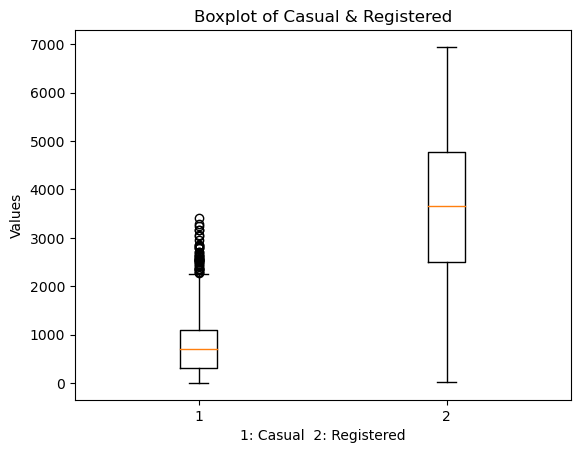

In [15]:
x = df['casual']
y = df['registered']
plt.boxplot([x, y])


plt.xlabel('1: Casual  2: Registered')
plt.ylabel('Values')
plt.title('Boxplot of Casual & Registered')

plt.show()

Here, we can see the difference between 'Casual' and 'Registered'.

'Casual' has outliers, which means the variance will be higher. Outliers are not close to the mean.

In [16]:
import sklearn.linear_model
import sklearn.tree
import sklearn.model_selection
import sklearn.ensemble
import sklearn.metrics

<font size = 5> Split the Data

In [17]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state=42)

Here, I split the data, am going to use for all the algorithms below.

<font size = 5> Scaling

<font size = 4>Min-Max Scaling (Normalization)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_minmax = scaler.fit_transform(x_train)   #We only fit with the training data.
x_test_minmax = scaler.transform(x_test)         #We transform on the testing data.

x_train_minmax

array([[1.        , 1.        , 0.90909091, ..., 0.32048692, 0.68874494,
        0.76258632],
       [0.66666667, 0.        , 0.72727273, ..., 0.62519676, 0.97617143,
        0.40641213],
       [1.        , 0.        , 1.        , ..., 0.30392016, 0.63679688,
        0.17508737],
       ...,
       [1.        , 0.        , 0.72727273, ..., 0.651183  , 0.88181818,
        0.30115922],
       [0.        , 1.        , 0.18181818, ..., 0.36832591, 0.49553974,
        0.47759782],
       [0.33333333, 0.        , 0.27272727, ..., 0.44395075, 0.8510826 ,
        0.54446786]])

I scaled the data after splitting because we only fit with the training data, and we transform on the testing data. Because if we do fit.transform data, including testing data, we are passing information about the test set to the training model.

<font size = 4>Standardization

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

x_train_std

array([[ 1.3604059 ,  0.96632025,  1.32291424, ..., -0.96152487,
         0.22342426,  1.9570449 ],
       [ 0.45346863, -1.03485361,  0.73917271, ...,  0.47558055,
         2.17101774,  0.0267188 ],
       [ 1.3604059 , -1.03485361,  1.61478501, ..., -1.03965885,
        -0.12857422, -1.22697175],
       ...,
       [ 1.3604059 , -1.03485361,  0.73917271, ...,  0.59813964,
         1.53168291, -0.5437112 ],
       [-1.3604059 ,  0.96632025, -1.01205189, ..., -0.7359015 ,
        -1.08572847,  0.41251767],
       [-0.45346863, -1.03485361, -0.72018112, ..., -0.37923147,
         1.32341949,  0.77492736]])

I added both 2 options for scaling for an example. I decided to proceed with Min-Max Scaling because Standardization Scaling did not result well.

<font size = 5> Random Forest Regression

<font size = 4> Train the Model

In [20]:
rf_reg = sklearn.ensemble.RandomForestRegressor(random_state=42)

rf_reg.fit(x_train_minmax, y_train)

RandomForestRegressor(random_state=42)

I wrote random_state=42 because I want to reduce the randomless from my results while I am experimenting.

In [21]:
help(sklearn.ensemble.RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators 

The number of estimators by default for the Random Forest Regression is 100. Which means it creates 100 trees. It averages the result from the each tree. This is a metod that we are using to reduce overfitting.


max_depth is none which means it doesn't set a depth limit. So, the tree can grow as much as it wants.


max_leaf_nodes is also none which means doesn't set a limit either.

<font size = 4> Predict the Model

In [22]:
pred = rf_reg.predict(x_test_minmax)
pred

array([6158.98, 1470.23, 3294.95, 3265.01, 6603.49, 6309.38, 1423.17,
       2300.79, 6037.1 , 5705.23, 1635.32, 2535.26, 4234.94, 4863.36,
       1828.36, 1335.77, 1801.68, 6743.16, 4025.4 , 2060.58, 6375.43,
       5064.15, 4595.02, 1616.53, 1618.51, 4038.96, 1676.95, 6269.68,
       3108.42, 4701.16, 2121.93, 3415.48, 5293.9 , 6040.77, 5123.56,
       3960.42, 6222.29, 4123.66, 3011.74,  857.84, 2832.87, 3016.72,
       6113.23, 3108.03, 5895.84, 2233.61, 3542.08, 4748.09, 3967.07,
       3528.58, 2641.93, 2404.13, 1553.88, 2796.43, 3954.87, 3475.08,
       3567.8 , 2544.17, 2697.18, 5655.82, 5129.17, 5880.57, 1716.07,
       4534.1 , 5793.54, 5486.66, 4292.91, 2762.08, 1153.63, 4885.45,
       2112.19, 1402.55, 3018.76, 2786.51, 4050.87, 2716.22, 4559.86,
       3808.37, 1318.95, 3554.9 , 2318.69, 1899.89, 4633.53, 4093.73,
       3469.5 , 2972.93, 3217.05, 2580.23, 3402.45, 3209.07, 1247.14,
       5872.08, 4956.11, 4862.48, 2462.99, 2054.34, 3903.52, 2650.73,
       2885.85, 3816

<font size = 4> Evaluate the Model

In [23]:
rf_reg_r2 = sklearn.metrics.r2_score(y_test, pred)
print('R2:', format(rf_reg_r2))

rf_reg_mse = sklearn.metrics.mean_squared_error(y_test, pred)
print('MSE:', format(rf_reg_mse))

print('Square Root of MSE:', np.sqrt(rf_reg_mse))

R2: 0.8838285088325416
MSE: 318446.1631027211
Square Root of MSE: 564.3103428989416


R2 and MSE scores are good.
Based on the result, I can compare with the target values. The accuracy is %87.4709. Not low but I can make it better with Hyperparameter Tuning.

<font size = 4> Hyperparameter Tuning

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

cv_grid = GridSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                       param_grid = {
                           'max_depth' : [None,10,20],
                           'n_estimators' : [100, 200],
                           'max_leaf_nodes' : [None,8,16]
                       })
cv_grid.fit(x_train_minmax, y_train)
cv_grid.best_params_

{'max_depth': None, 'max_leaf_nodes': None, 'n_estimators': 200}

The outputs are my optimal/best hyperparameters.

I wrote value of "None" for both max_depth and max_leaf_nodes defaults are none (refer to the "help" line above). GridSearchCV is an automated way trying different combinations of parameters and finding the best one.

<font size = 4> Train the Model Again

In [25]:
rf_reg = sklearn.ensemble.RandomForestRegressor(random_state=42,
                                                max_depth = None,
                                                max_leaf_nodes = None,
                                                n_estimators = 200)

rf_reg.fit(x_train_minmax,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

Here, I worte the paramenetes same as my optimal/best hyperparameters above.

<font size = 4>Predict the Model Again

In [26]:
pred = rf_reg.predict(x_test_minmax)
pred

array([6158.695, 1471.72 , 3260.795, 3265.895, 6644.895, 6271.185,
       1422.045, 2274.81 , 6000.23 , 5676.74 , 1690.355, 2557.995,
       4237.97 , 4896.425, 1808.4  , 1325.065, 1805.995, 6749.105,
       4014.785, 2043.585, 6354.765, 5049.125, 4599.835, 1615.235,
       1610.92 , 4043.465, 1681.8  , 6273.18 , 3134.455, 4695.3  ,
       2176.835, 3408.73 , 5319.67 , 6010.15 , 5097.635, 3917.83 ,
       6185.625, 4135.145, 2969.035,  879.275, 2797.89 , 3092.13 ,
       6099.82 , 3133.875, 5927.54 , 2185.675, 3523.76 , 4726.095,
       3982.74 , 3556.89 , 2624.625, 2433.915, 1569.255, 2812.495,
       3964.73 , 3463.53 , 3627.105, 2557.83 , 2666.635, 5671.54 ,
       5079.23 , 5857.825, 1718.645, 4524.72 , 5769.14 , 5489.115,
       4321.585, 2793.445, 1155.845, 4940.075, 2146.76 , 1448.675,
       3140.425, 2760.19 , 4053.55 , 2755.48 , 4695.19 , 3792.53 ,
       1315.335, 3554.905, 2392.2  , 1862.91 , 4713.395, 4090.25 ,
       3438.475, 2941.85 , 3160.02 , 2614.075, 3386.865, 3212.

<font size = 4> Evaluate the Model Again

In [27]:
rf_reg_r2 = sklearn.metrics.r2_score(y_test, pred)
print('R2:', format(rf_reg_r2))

rf_reg_mse = sklearn.metrics.mean_squared_error(y_test, pred)
print('MSE:', format(rf_reg_mse))

print('Square Root of MSE:', np.sqrt(rf_reg_mse))

R2: 0.8849825545335496
MSE: 315282.7241054422
Square Root of MSE: 561.500422177439


Before the cross-validation, my result was as follows:
<br>R2: 0.8838
<br>MSE: 318446.16
<br>Square Root of MSE: 564.31

Improvement after the Hyperparameter Tuning: %0.9933

Now, my model slightly improved.  Which means the model has a better fit to the data and is able to capture and explain a significant amount of the variation in the target variable. There is a low probability that a good prediction is just a coincidence.
<br>R2 got higher and MSE got lower a little which means it is more accurate now.

Based on the result, I can compare with the target values. The accuracy is %87.5332.

Accuracy = ((Mean of the target value - Square root of MSE)*100)/(Mean of target value)

<font size = 4> Feature Importance

In [28]:
rf_reg.feature_importances_

array([0.0754928 , 0.33121753, 0.08817654, 0.00344953, 0.01294845,
       0.07525639, 0.01703107, 0.18441583, 0.12792191, 0.05412581,
       0.02996413])

<BarContainer object of 11 artists>

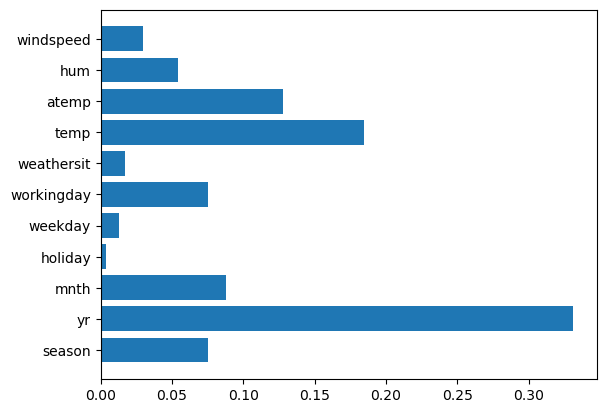

In [29]:
plt.barh(X.columns, rf_reg.feature_importances_)

Here, we can see which variables more important for my model. Temperature and year are the most important variables.


Also, all of these variables have different scales for all the variables (refer the "description" line above. For example, "Registered" is up around 100, "Casual" is in hundreds, "Instant" is also relatively high.

<font size = 5> XGBoost

In [30]:
import xgboost as xgb

<font size=4>Train the Model

In [31]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          learning_rate = 0.01,
                          max_depth = 5)


The values inside () above are my hyperparameters. I tried different values for these parameters. learning_rate = 0.01, max_depth = 5 are ended up better than the others experiments.

In [32]:
xg_reg.fit(x_train_minmax,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In this table, we can see the model details and the options here.

<font size = 4>Predict the Model

In [33]:
preds = xg_reg.predict(x_test_minmax)

<font size = 4>Evaluate the Model

In [34]:
test_score = xg_reg.score(x_test_minmax, y_test)
print(f"R2: {test_score}")

rmse = (mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("Square Root of RMSE: %f" % (rmse))

R2: 0.12882665054355058
RMSE: 2388036.924927
Square Root of RMSE: 1545.327449


R2 is very low, MSE is very high. Based on the result, I can compare with the target values. The accuracy is %65.69, very low.

I can improve by doing cross-validation and searching for a better set of hyperparameters.

<font size = 4> Cross-Validation

In [35]:
#Use DMatrices of XGBoost
data_dmatrix_train = xgb.DMatrix(data=x_train_minmax,
                                 label=y_train)
data_dmatrix_test = xgb.DMatrix(data=x_test_minmax,
                                label=y_test)

for lr in [0.1, 0.2, 0.3]:
    for md in [3, 10]:

        params = {"objective":"reg:squarederror",
                  'colsample_bytree': 0.3,
                  'learning_rate': lr,
                  'max_depth': md,
                  'alpha': 10}

        cv_results = xgb.cv(dtrain=data_dmatrix_train,
                            params=params,
                            nfold=3,
                            num_boost_round=100,
                            early_stopping_rounds=10,
                            metrics="rmse",
                            as_pandas=True,
                            seed=123)
        print(lr,md,(cv_results["test-rmse-mean"]).tail(1))

0.1 3 99    554.858399
Name: test-rmse-mean, dtype: float64
0.1 10 99    642.901841
Name: test-rmse-mean, dtype: float64
0.2 3 55    556.834068
Name: test-rmse-mean, dtype: float64
0.2 10 62    700.429867
Name: test-rmse-mean, dtype: float64
0.3 3 41    563.600833
Name: test-rmse-mean, dtype: float64
0.3 10 42    762.646036
Name: test-rmse-mean, dtype: float64


Parameters:
nfold = 3 means the data will be split into 3 folds.
num_boost_round = 100 means MSE gets lower and lower up to 100 tree.
early_stopping_rounds = 10 means if the performance of the model does not improve for 10 consecutive rounds, the training will be stopped.


Here, I am comparing different values of hyperparameters against each other to see which one gives us the best result of MSE.

The first one which is 554.85 is the best MSE for this particular set. learning_rate = 0.1 and max_depth = 3.



In [36]:
cv_results["test-rmse-mean"].tail()

38    763.307725
39    763.162052
40    763.136585
41    762.810426
42    762.646036
Name: test-rmse-mean, dtype: float64

<font size = 4> Train the Model Again

In [37]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1,
                          max_depth = 3)

I wrote learning_rate = 0.1 and max_depth = 3 because they are my best hyperparameters that is shown above.

In [38]:
xg_reg.fit(x_train_minmax,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

We can see the model details and the options here again.

<font size = 4> Predict the Model Again

In [39]:
#Get the predicted class probabilities
preds = xg_reg.predict(x_test_minmax)

<font size = 4> Evaluate the Model Again

In [40]:
test_score = xg_reg.score(x_test_minmax, y_test)
print(f"R2: {test_score}")

print(f"RMSE: {mean_squared_error(y_test, preds)}")

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("Square Root of RMSE: %f" % (rmse))

R2: 0.890129148834796
RMSE: 301175.0184040857
Square Root of RMSE: 548.794149


Before the cross-validation, the score was as follows:
<br>R2: 0.1288
<br>RMSE: 2388036.92
<br>Square Root of RMSE: 1545.32

Improvement after the cross-validation: %87.38

Now, my R2 went so much higher and Square Root of RMSE got so much lower. That means my model predicts much better now.

Based on the result, I can compare with the target values. The accuracy is %87.8155.

Accuracy = ((Mean of the target value - Square root of MSE)*100)/(Mean of target value)


<font size = 4> Feature Importance

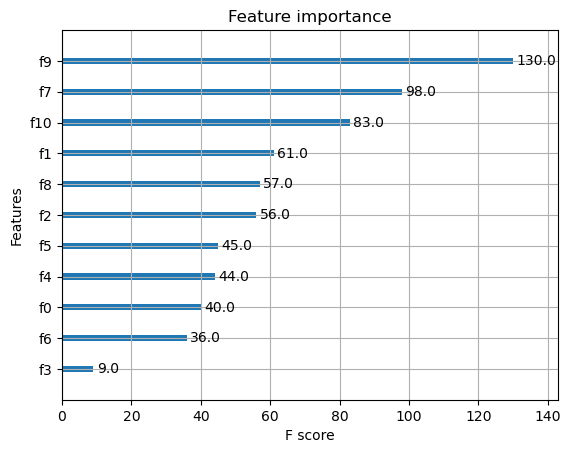

In [41]:
xgb.plot_importance(xg_reg)
plt.show()

Here, we can see the important variables that affects my model the most. f variables are the columns of my dataset, refer to the table below.

f0: season
f1: yr
f2: mnth
f3: holiday
f4: weekday
f5: workingday
f6: weathersit
f7: temp
f8: atemp
f9: hum
f10: windspeed

In [42]:
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300


<font size = 4>Decision Tree

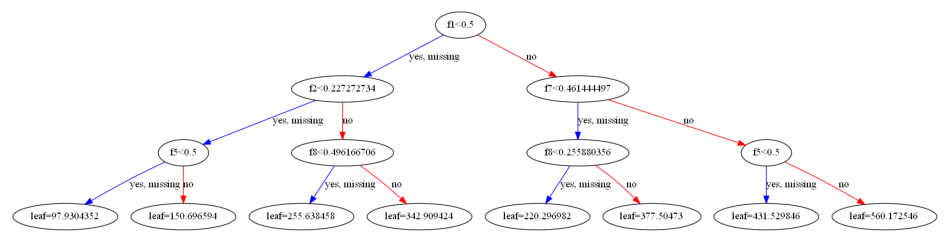

In [43]:
fig = plt.figure(figsize=(12,7))
ax = plt.gca()
xgb.plot_tree(xg_reg,num_trees=0,ax=ax)
plt.show()

This is the structure of the tree that is the result of the training. We can see that max_depth is 3.
First one (f1) uses the value of year to make the first decision. And then, it uses months (f2) and the tempeture (f7). Refer to the table above for f values.

<font size = 5> TensorFlow (Deep Neural Networks)

In [44]:
from tensorflow import keras
import tensorflow as tf
from keras.datasets import mnist
from keras import models
from keras import layers

In [45]:
print(y_train.shape)
print(y_test.shape)

print(y)

(584,)
(147,)
0       654
1       670
2      1229
3      1454
4      1518
       ... 
726    1867
727    2451
728    1182
729    1432
730    2290
Name: registered, Length: 731, dtype: int64


In [46]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

<font size = 4> Define the Model

In [47]:
#Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

seed = 42 because I wrote random_state = 42 also. It is good to write the same number when we compare the difference between the models.

In [48]:
model = Sequential()
model.add(Dense(200, activation = 'relu', input_dim = 11))    #11 because I dropped some columns.
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1))
filepath = 'my_best_model.hdf5'

I tried a lot of different dense size and number of layers. 5 x 200 gave me the best result.

In [49]:
opt = tf.keras.optimizers.Adam(0.01)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='min')

I am creating an Adam optimizer so that I can change the learning rate and experiment. Adam is the one of optimizers that gives me actual number for loss. I picked that because it improved my results.
I tried some other values and decided to keep 0.01 because it gave me the best score.

<font size = 4>Compile the Model

In [50]:
from tensorflow.keras.losses import mean_squared_error
model.compile(loss=mean_squared_error, optimizer=opt, metrics=['mse'])

Here, I picked "mse" metric for Adam optimizer, because the others didn't give the as good score as this such one, as "rmsprop".

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               2400      
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 163,401
Trainable params: 163,401
Non-trai

<font size = 4>Build the Model

In [52]:
r = model.fit(x_train_minmax, y_train, epochs=200,validation_data=(x_test_minmax,y_test),callbacks=[checkpoint])

Epoch 1/200
19/19 [==============================] - 3s 31ms/step - loss: 7167065.5000 - mse: 7167065.5000 - val_loss: 3311030.7500 - val_mse: 3311030.7500
Epoch 2/200
19/19 [==============================] - 0s 13ms/step - loss: 1144329.7500 - mse: 1144329.7500 - val_loss: 772399.6250 - val_mse: 772399.6250
Epoch 3/200
19/19 [==============================] - 0s 13ms/step - loss: 682229.6250 - mse: 682229.6250 - val_loss: 533114.6875 - val_mse: 533114.6875
Epoch 4/200
19/19 [==============================] - 0s 13ms/step - loss: 496392.9375 - mse: 496392.9375 - val_loss: 480763.9688 - val_mse: 480763.9688
Epoch 5/200
19/19 [==============================] - 0s 9ms/step - loss: 499913.6562 - mse: 499913.6562 - val_loss: 482069.9375 - val_mse: 482069.9375
Epoch 6/200
19/19 [==============================] - 0s 13ms/step - loss: 461108.8750 - mse: 461108.8750 - val_loss: 459759.9062 - val_mse: 459759.9062
Epoch 7/200
19/19 [==============================] - 0s 9ms/step - loss: 435625.656

Epoch 55/200
19/19 [==============================] - 0s 8ms/step - loss: 333551.6562 - mse: 333551.6562 - val_loss: 429214.4688 - val_mse: 429214.4688
Epoch 56/200
19/19 [==============================] - 0s 8ms/step - loss: 289876.3438 - mse: 289876.3438 - val_loss: 375901.6562 - val_mse: 375901.6562
Epoch 57/200
19/19 [==============================] - 0s 9ms/step - loss: 242521.1562 - mse: 242521.1562 - val_loss: 418565.7188 - val_mse: 418565.7188
Epoch 58/200
19/19 [==============================] - 0s 9ms/step - loss: 239968.4688 - mse: 239968.4688 - val_loss: 337618.7812 - val_mse: 337618.7812
Epoch 59/200
19/19 [==============================] - 0s 14ms/step - loss: 233123.7500 - mse: 233123.7500 - val_loss: 300533.0938 - val_mse: 300533.0938
Epoch 60/200
19/19 [==============================] - 0s 9ms/step - loss: 294225.4062 - mse: 294225.4062 - val_loss: 443264.9375 - val_mse: 443264.9375
Epoch 61/200
19/19 [==============================] - 0s 9ms/step - loss: 285610.6875 -

Epoch 109/200
19/19 [==============================] - 0s 8ms/step - loss: 218990.6094 - mse: 218990.6094 - val_loss: 400580.0312 - val_mse: 400580.0312
Epoch 110/200
19/19 [==============================] - 0s 8ms/step - loss: 219227.0781 - mse: 219227.0781 - val_loss: 485154.4375 - val_mse: 485154.4375
Epoch 111/200
19/19 [==============================] - 0s 9ms/step - loss: 247678.0781 - mse: 247678.0781 - val_loss: 434684.5312 - val_mse: 434684.5312
Epoch 112/200
19/19 [==============================] - 0s 8ms/step - loss: 232841.5625 - mse: 232841.5625 - val_loss: 393380.9375 - val_mse: 393380.9375
Epoch 113/200
19/19 [==============================] - 0s 9ms/step - loss: 207898.8594 - mse: 207898.8594 - val_loss: 368372.7812 - val_mse: 368372.7812
Epoch 114/200
19/19 [==============================] - 0s 8ms/step - loss: 186099.5156 - mse: 186099.5156 - val_loss: 430920.5938 - val_mse: 430920.5938
Epoch 115/200
19/19 [==============================] - 0s 9ms/step - loss: 277486.

In this line, I changed the epochs many times, starting a small number to bigger number. Eventually, 200 was a good epochs to keep.

<font size = 4>Plots for Loss and Validation Loss

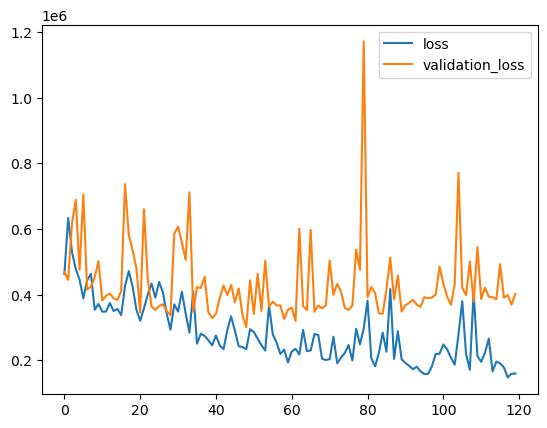

In [53]:
plt.plot(r.history['loss'][10:130],label='loss')
plt.plot(r.history['val_loss'][10:130],label='validation_loss')
plt.legend()

In this plot, we see that the loss and validation loss are getting lower which means DNN is learning, and the predictions are getting better.

<font size = 4>Evaluate the Model

In [54]:
#Get the predicted class probabilities
model = load_model(filepath)
pred = model.predict(x_test_minmax)

dnn_r2 = sklearn.metrics.r2_score(y_test, pred)
print('R2:', format(dnn_r2))

dnn_mse = sklearn.metrics.mean_squared_error(y_test, pred)
print('MSE:', format(dnn_mse))

print('Square root of MSE:', np.sqrt(dnn_mse))

5/5 [==============================] - 0s 3ms/step
R2: 0.8903633563556062
MSE: 300533.0150552237
Square root of MSE: 548.2089155196436


R2 is pretty high, even higher than the other models. That indicates that my model has a good ability to capture and explain the variation in the target variable.

MSE came out less than the other algorithms, which means the model's predictions are more accurate and have a lower average squared difference from the true values.

Based on the result, I can compare with the target values. The accuracy is %87.8285, which is the the best accuracy compared to the others.

Accuracy = ((Mean of the target value - Square root of MSE)*100)/(Mean of target value)

<font size = 5>Discussion

After running all the algorithms, Neural Networks is the best algorithm that makes the predictions. Also, Neural Networks is the most popular and cutting-edge ML algorithm in the market right now. I had to make it deeper and increased the number of nodes to improve the accuracy. Initially, I was getting a low MSE in the training data but higher MSE in the testing data, which showed overfitting. In order to fix this, I played with the parameters and the learning rate as well to get the best result.


<b>My target variable statistics:</b>
<br>Range is between 22 and 8714.
<br>Mean: 4504
<br>Median: 4548
<br>Mode: 1162

Below on the "Accuracy" line, I have compared each algorithm with the mean of the target value. This way we can compare the accuracy percentage of each model.
<br>Accuracy = ((Mean of the target value - Square root of MSE)*100)/(Mean of target value)


<b>EACH ALGORITHM MEASUREMENTS</b>

<b>Neural Networks</b>
<br>R2: 0.8903
<br>MSE: 300533.01
<br>Square root of MSE: 548.20
<br>Accuracy: %87.8285
<br>Advantages: It can understand, more complex relationships in the data.
<br>Disadvantages: It requires more processing power and time to train. It has very low interpretability. It is hard to know the reason of the prediction.


<b>XGBoost</b>
<br>R2: 0.89
<br>RMSE: 301175.01
<br>Square Root of RMSE: 548.79
<br>The accuracy: %87.8155
<br>Improvement after the cross-validation: %87.38
<br>Advantages: It is very flexible. There are a lot of available parameters that we can play with. XGBoost is also very powerful, and it wins a lot of Kaggle competitions.
<br>Disadvantages: XGBoost performs best with a sufficient amount of training data. However, my dataset was not very big.


<b>Random Forest Regression</b>
<br>R2: 0.8849
<br>MSE: 315282.72
<br>Square Root of MSE: 561.50
<br>The accuracy: %87.5332
<br>Improvement after the Hyperparameter Tuning: %0.9933
<br>Advantages: It is more robust to overfitting. It handles missing data and outliers better.
<br>Disadvantages: It is better with a lager dataset. It has a lower explainability than XGBoost because by running the data 100 different trees, it is hard to see with variable is impacting the decision the most.
